In [1]:
### Q1. What is the purpose of grid search cv in machine learning, and how does it work?
#1. Definir el espacio de búsqueda: Se especifican los hiperparámetros y sus valores posibles.

#2. Dividir los datos: Los datos se dividen en conjuntos de entrenamiento y prueba.

#3. Ejecutar la búsqueda: Para cada combinación de hiperparámetros, se entrena el modelo en el conjunto de entrenamiento y se evalúa en el conjunto de prueba.

#4. Evaluar el modelo: Se calcula la métrica de evaluación (p. ej., precisión, F1) para cada combinación de hiperparámetros.

#5. Seleccionar la mejor combinación: Se selecciona la combinación de hiperparámetros con la mejor métrica de evaluación.

#GridSearchCV es una herramienta útil para encontrar la mejor combinación de hiperparámetros, lo que puede mejorar significativamente el rendimiento del modelo. Sin embargo, puede ser computacionalmente costoso, especialmente con grandes conjuntos de datos o modelos complejos.


In [2]:
#Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?


#GridSearchCV

#- Exhaustively searches through a predefined grid of hyperparameters
#- Evaluates every possible combination of hyperparameters
#- Guarantees to find the optimal combination, but can be computationally expensive

#RandomizedSearchCV

#- Randomly samples a specified number of hyperparameter combinations from a distribution
#- Evaluates a subset of possible combinations, rather than the entire grid
#- Faster and more efficient than GridSearchCV, but may not find the absolute optimal combination

#Choose GridSearchCV when:

#- You have a small to moderate number of hyperparameters
#- You want to ensure finding the optimal combination
#- Computational resources are not a concern

#Choose RandomizedSearchCV when:

#- You have a large number of hyperparameters
#- You want to speed up the search process
#- You're willing to trade off some optimality for efficiency


In [3]:
### Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Example dataset with target leakage
data = {
    'income': [50000, 60000, 70000, 80000, 90000],
    'loan_amount': [20000, 25000, 30000, 35000, 40000],
    'loan_repayment_status': [1, 1, 0, 0, 1],  # Leaked feature
    'default': [0, 0, 1, 1, 0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Split the data into features and target
X = df[['income', 'loan_amount', 'loan_repayment_status']]
y = df['default']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with Data Leakage:", accuracy)

Model Accuracy with Data Leakage: 0.0


In [4]:
## Q4. How can you prevent data leakage when building a machine learning model?

#1. Proper Data Splitting:
    #- Split data into training, validation, and testing sets (e.g., 80% for training, 10% for validation, and 10% for testing).
    #- Ensure the splits are random and representative of the population.

#2. Avoid Using Future Information:
#    - Only use data available at the time of prediction.
 #   - Exclude features that won't be available in real-world scenarios.

#3. Data Preprocessing:
#    - Perform data preprocessing (e.g., normalization, feature scaling) separately for each split.
 #   - Avoid using the entire dataset for preprocessing, as this can leak information.

#4. Feature Engineering:
#    - Create features using only the training data.
#    - Avoid using features that are derived from the target variable.

#5. Cross-Validation:
#    - Use techniques like k-fold cross-validation to evaluate model performance.
 #   - Ensure the validation set is not used for training.

#6. Walk-Forward Optimization:
#    - Use this technique for time series data to avoid lookahead bias.

#7. Monitor and Test:
#    - Continuously monitor model performance on unseen data.
 #   - Test the model on new data to detect potential data leakage.

#8. Document and Review:
#    - Document data processing and feature engineering steps.
#    - Review the process to ensure no data leakage has occurred.

#By following these guidelines, you can minimize the risk of data leakage and develop robust, generalizable machine learning models.

NameError: name 'plt' is not defined

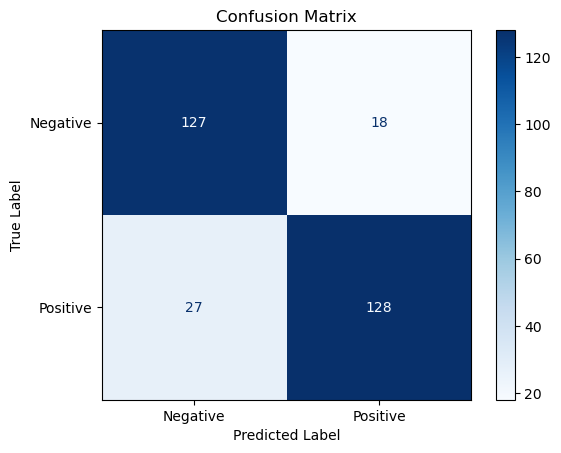

In [5]:
## Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?


import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Label")
disp.ax_.set_ylabel("True Label")
plt.show()
